In [1]:
import pandas as pd

In [2]:
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [3]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# se utiliza para codificar variables categóricas en variables numéricas
from sklearn.preprocessing import LabelEncoder

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [4]:
#Carga de dataset
data = pd.read_csv('loan_approval_dataset.csv', header=0, skipinitialspace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
# Eliminar columnas irrelevantes para la regresion
columna_eliminar = ['loan_id', 'no_of_dependents']
data.drop(columna_eliminar, axis=1, inplace=True)

# Muestra el DataFrame resultante
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   education                 4269 non-null   object
 1   self_employed             4269 non-null   object
 2   income_annum              4269 non-null   int64 
 3   loan_amount               4269 non-null   int64 
 4   loan_term                 4269 non-null   int64 
 5   cibil_score               4269 non-null   int64 
 6   residential_assets_value  4269 non-null   int64 
 7   commercial_assets_value   4269 non-null   int64 
 8   luxury_assets_value       4269 non-null   int64 
 9   bank_asset_value          4269 non-null   int64 
 10  loan_status               4269 non-null   object
dtypes: int64(8), object(3)
memory usage: 367.0+ KB


In [7]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [8]:
print(columnas_categoricas)

Index(['education', 'self_employed', 'loan_status'], dtype='object')


In [9]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  # se crea una instancia (se utiliza para convetir categoricos a numericos)
  le = LabelEncoder()
  # cambia de categoricos a numericos unico
  data[columna] = le.fit_transform(data[columna])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   education                 4269 non-null   int32
 1   self_employed             4269 non-null   int32
 2   income_annum              4269 non-null   int64
 3   loan_amount               4269 non-null   int64
 4   loan_term                 4269 non-null   int64
 5   cibil_score               4269 non-null   int64
 6   residential_assets_value  4269 non-null   int64
 7   commercial_assets_value   4269 non-null   int64
 8   luxury_assets_value       4269 non-null   int64
 9   bank_asset_value          4269 non-null   int64
 10  loan_status               4269 non-null   int32
dtypes: int32(3), int64(8)
memory usage: 317.0 KB


In [11]:
longitud = 4269
train_long = longitud - longitud * 0.2
test_long = longitud - longitud * 0.8
print(f'Test longitud {int(np.round(test_long))}, Train longitud {int(train_long)}')

Test longitud 854, Train longitud 3415


In [12]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3415 entries, 1675 to 860
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   education                 3415 non-null   int32
 1   self_employed             3415 non-null   int32
 2   income_annum              3415 non-null   int64
 3   loan_amount               3415 non-null   int64
 4   loan_term                 3415 non-null   int64
 5   cibil_score               3415 non-null   int64
 6   residential_assets_value  3415 non-null   int64
 7   commercial_assets_value   3415 non-null   int64
 8   luxury_assets_value       3415 non-null   int64
 9   bank_asset_value          3415 non-null   int64
 10  loan_status               3415 non-null   int32
dtypes: int32(3), int64(8)
memory usage: 280.1 KB


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854 entries, 1703 to 1114
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   education                 854 non-null    int32
 1   self_employed             854 non-null    int32
 2   income_annum              854 non-null    int64
 3   loan_amount               854 non-null    int64
 4   loan_term                 854 non-null    int64
 5   cibil_score               854 non-null    int64
 6   residential_assets_value  854 non-null    int64
 7   commercial_assets_value   854 non-null    int64
 8   luxury_assets_value       854 non-null    int64
 9   bank_asset_value          854 non-null    int64
 10  loan_status               854 non-null    int32
dtypes: int32(3), int64(8)
memory usage: 70.1 KB


In [15]:
train_data.to_csv("train.csv", index=False)

In [16]:
test_data.to_csv("test.csv", index=False)

In [17]:
#Carga de dataset
data = pd.read_csv('train.csv')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   education                 3415 non-null   int64
 1   self_employed             3415 non-null   int64
 2   income_annum              3415 non-null   int64
 3   loan_amount               3415 non-null   int64
 4   loan_term                 3415 non-null   int64
 5   cibil_score               3415 non-null   int64
 6   residential_assets_value  3415 non-null   int64
 7   commercial_assets_value   3415 non-null   int64
 8   luxury_assets_value       3415 non-null   int64
 9   bank_asset_value          3415 non-null   int64
 10  loan_status               3415 non-null   int64
dtypes: int64(11)
memory usage: 293.6 KB


In [19]:
X = data.iloc[:, :10]
y = data.iloc[:, 10]
m = y.size

In [20]:
print(X)
print('*'*25)
print(y)

      education  self_employed  income_annum  loan_amount  loan_term  \
0             1              0       7900000     29900000          6   
1             1              1       9600000     34000000         12   
2             0              0        800000      2900000          8   
3             0              1       4900000     13100000         18   
4             0              1       3000000     11100000         12   
...         ...            ...           ...          ...        ...   
3410          0              1       1300000      4700000         16   
3411          1              1        500000      1800000         18   
3412          1              1       8600000     20600000         16   
3413          1              1       7000000     21400000         12   
3414          0              0       6200000     17300000          6   

      cibil_score  residential_assets_value  commercial_assets_value  \
0             568                   5800000                 139

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   education                 3415 non-null   int64
 1   self_employed             3415 non-null   int64
 2   income_annum              3415 non-null   int64
 3   loan_amount               3415 non-null   int64
 4   loan_term                 3415 non-null   int64
 5   cibil_score               3415 non-null   int64
 6   residential_assets_value  3415 non-null   int64
 7   commercial_assets_value   3415 non-null   int64
 8   luxury_assets_value       3415 non-null   int64
 9   bank_asset_value          3415 non-null   int64
 10  loan_status               3415 non-null   int64
dtypes: int64(11)
memory usage: 293.6 KB


In [22]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # Convierte la entrada a un arreglo numpy
    z = np.array(z)

    # Limita los valores de z para evitar overflow
    z = np.clip(z, -500, 500)

    g = 1 / (1 + np.exp(-z))

    return g

In [23]:
# Prueba la implementacion de la funcion sigmoid
z = 0.5
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0.5 ) =  0.6224593312018546


In [24]:
def  featureNormalize(X):
    # Se crea una copia del conjunto de datos X para evitar modificar los datos originales.
    X_norm = X.copy()
    # se crea un arreglo de 0 para almacenar la media y desviacion estandar
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # media
    mu = np.mean(X, axis = 0)
    # desviacion estandar
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [25]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('*'*20)
print('Media calculada:', mu)
print('*'*20)
print('Desviación estandar calculada:', sigma)
print('*'*20)
print(X_norm)

      education  self_employed  income_annum  loan_amount  loan_term  \
0             1              0       7900000     29900000          6   
1             1              1       9600000     34000000         12   
2             0              0        800000      2900000          8   
3             0              1       4900000     13100000         18   
4             0              1       3000000     11100000         12   
...         ...            ...           ...          ...        ...   
3410          0              1       1300000      4700000         16   
3411          1              1        500000      1800000         18   
3412          1              1       8600000     20600000         16   
3413          1              1       7000000     21400000         12   
3414          0              0       6200000     17300000          6   

      cibil_score  residential_assets_value  commercial_assets_value  \
0             568                   5800000                 139

In [26]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
print(m)
print(n)
# Agrega el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

print(X)

3415
10
[[ 1.          1.00263891 -1.01504731 ...  2.04678575  0.07808278
   1.16041374]
 [ 1.          1.00263891  0.98517575 ...  1.22311091  2.49843196
   0.88201987]
 [ 1.         -0.99736803 -1.01504731 ... -0.8818359  -1.33923881
  -1.31419838]
 ...
 [ 1.          1.00263891  0.98517575 ...  1.29175048  1.47359943
   0.13963624]
 [ 1.          1.00263891  0.98517575 ... -0.83607619  0.50327926
   1.4388076 ]
 [ 1.         -0.99736803 -1.01504731 ... -0.28695963  1.03750048
  -0.10782497]]


In [27]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X.dot(theta.T))

    epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))

    # J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [28]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [29]:
data = pd.read_csv('test.csv')
print(data)

     education  self_employed  income_annum  loan_amount  loan_term  \
0            0              0       5400000     19700000         20   
1            0              0       5900000     14000000          8   
2            0              0       9600000     19900000         14   
3            0              0       6200000     23400000          8   
4            1              1       5800000     14100000         12   
..         ...            ...           ...          ...        ...   
849          0              0       2500000      5400000         10   
850          0              0       7700000     16700000          6   
851          1              1       5600000     11500000          4   
852          1              0       2200000      8600000         20   
853          1              0       2900000      8900000          6   

     cibil_score  residential_assets_value  commercial_assets_value  \
0            423                   6500000                 10000000   
1    

In [30]:
fila_deseada = 11

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].tolist()
  print(fila_completa)
else:
  print("La fila no existe")

[1, 1, 2900000, 6300000, 6, 719, 7900000, 1600000, 8000000, 1600000, 0]


theta calculado por el descenso por el gradiente: [-1.71867246  0.0192845  -0.07050833  0.97791368 -0.96761531  0.84452601
 -4.11205205 -0.00466083 -0.05528581 -0.04048589 -0.01541668]
0.9124980912437755


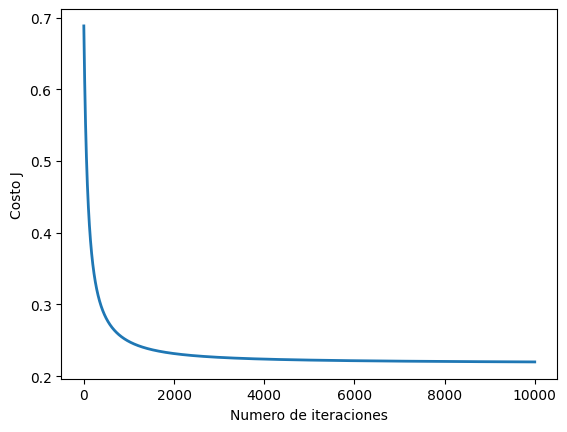

In [31]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.03 #0.001
num_iters = 10000 # 100

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1, 1, 0, 2900000, 6300000, 6, 719, 790000, 1600000, 8000000, 1600000]
mean = np.mean(X_array)
std = np.std(X_array)
X_array = (X_array - mean) / std


z = np.dot(X_array, theta)
probability = sigmoid(z)

print(probability)

# print(f" (usando el descenso por el gradiente):{aprueba}")
#0.9124981079062219

In [32]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    epsilon = 1e-10  # Un valor pequeño para evitar divisiones por cero
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [33]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)
print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[ 0.12079063  0.00222171  0.00127091 -0.01065619  0.00455323 -0.05606826
  0.37432036 -0.01088963  0.00371114 -0.00932122 -0.00681054]


In [34]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([0.12079063,  0.00222171,  0.00127091, -0.01065619,  0.00455323, -0.05606826,
  0.37432036, -0.01088963,  0.00371114, -0.00932122, -0.00681054])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 11.301\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.150, 0.003, 0.001]')

[ 0.12079063  0.00222171  0.00127091 -0.01065619  0.00455323 -0.05606826
  0.37432036 -0.01088963  0.00371114 -0.00932122 -0.00681054]
Costo en theta prueba: 0.871
Costo esperado (aproximado): 11.301

Gradiente en theta prueba:
	[0.150, 0.003, 0.001]
Gradiente esperado (aproximado):
	[0.150, 0.003, 0.001]


In [35]:
# Establecer las opciones para optimize.minimize
# options= {'maxiter': 1000}
options= {}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-1.803, 0.022, -0.066]')

Costo con un valor de theta encontrado por optimize.minimize: 0.218
Costo esperado (aproximado): 0.218

theta:
	[-1.803, 0.022, -0.066]
Theta esperado (aproximado):
	[-1.803, 0.022, -0.066]


In [36]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

In [37]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)
      # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Graficar la línea límite de decisión
        pyplot.plot(plot_x, plot_y)

        # Leyenda, específica para el ejercicio
        pyplot.legend(['Aceptado', 'No aceptado', 'Límite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
       # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))
        # Evaluar z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # Importante transponer z antes de llamar al contorno

        # Plot z = 0 como contorno y z < 0 como región negativa
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


NameError: name 'mapFeature' is not defined

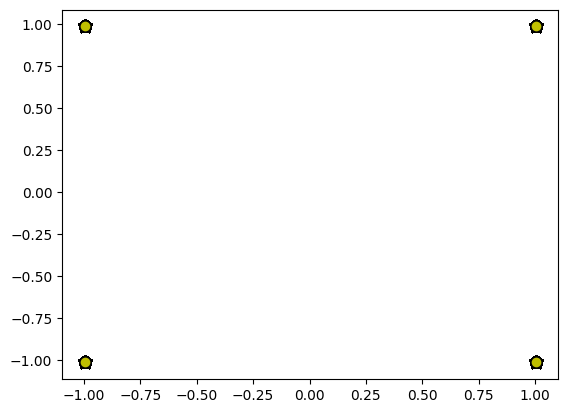

In [39]:
# Graficar limites
plotDecisionBoundary(plotData, theta, X, y)

In [40]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [41]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 596.0, 1.0, 1.0, 32.0, 3.0, 96709.07, 2.0, 0.0, 0.0, 41788.37], theta))
print (prob)
# print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
# print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
# print('Precisión esperada (aproximadamente): 92.04 %')

7.124576406741285e-218
Precisión de entrenamiento: 92.04 %
